In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from comparers import ModelComparer, plot_decision_boundary
from diro2c_wrapper import WrappedDiro2C, plot_diro2c_2d, plot_diro2c_tree, \
                           print_diro2c_rules
from baseline import print_rules, plot_tree_leafs_for_class
from tasks.gaussian_quantiles import make_task
from sklearn.model_selection import train_test_split

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

# Global explanations

In [4]:
mclass_diff = comparer.predict_mclass_diff(X)

## $(1,0)$

In [5]:
focus_class = '(1, 0)'

In [7]:
%%time
#X_sample, _ = train_test_split(X, train_size=0.1, random_state=0)
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global',
                                          focus_class=focus_class, gn_population_size=200)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 39.7 s, sys: 209 ms, total: 39.9 s
Wall time: 40.8 s


In [6]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [7]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [8]:
def explain(max_depth=None, tree_fig_size=(28, 14)):
    global tree
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_explain, y_explain)
    
    feature_importances = tree.feature_importances_
    feature_order = np.flip(np.argsort(feature_importances))
    fig, ax = plt.subplots(figsize=(5, 2))
    ax.set_title('Relative feature importance')
    ax.scatter(np.flip(feature_importances[feature_order]),
               np.flip(comparer.feature_names[feature_order]))
    ax.set_xlim((0, ax.get_xlim()[1]))
    plt.show()
    
    fig, ax = plt.subplots(figsize=(14, 14))
    plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, node_ids=True, precision=2)
    
    y_test = mclass_diff == np.where(comparer.class_names == focus_class)[0][0]
    print_rules(tree, feature_names, class_names, focus_class, X_test=X, y_test=y_test, precision=2)
    
    plot_tree_leafs_for_class(tree, class_names, focus_class, X, mclass_diff, comparer.class_names, feature_names)
    
    print('\ngenerated data evaluation:')
    print(classification_report(y_explain, tree.predict(X_explain), target_names=class_names))

    print('\noriginal data evaluation:')
    print(classification_report(mclass_diff == np.where(comparer.class_names == focus_class)[0][0], tree.predict(X), target_names=class_names))

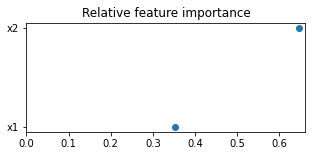

node #7: if (x1 <= -74.5) and (x2 > -81.5) then class (1, 0) (covers 0.553 of 396 instances)
node #4: if (x1 <= 110.5) and (x2 > -126.5) and (x2 <= -81.5) then class (1, 0) (covers 0.82 of 245 instances)

generated data evaluation:
              precision    recall  f1-score   support

  not (1, 0)       0.74      0.78      0.76      1000
      (1, 0)       0.66      0.61      0.63       690

    accuracy                           0.71      1690
   macro avg       0.70      0.69      0.70      1690
weighted avg       0.71      0.71      0.71      1690


original data evaluation:
              precision    recall  f1-score   support

  not (1, 0)       0.88      0.79      0.83       499
      (1, 0)       0.32      0.48      0.38       101

    accuracy                           0.74       600
   macro avg       0.60      0.63      0.61       600
weighted avg       0.79      0.74      0.76       600



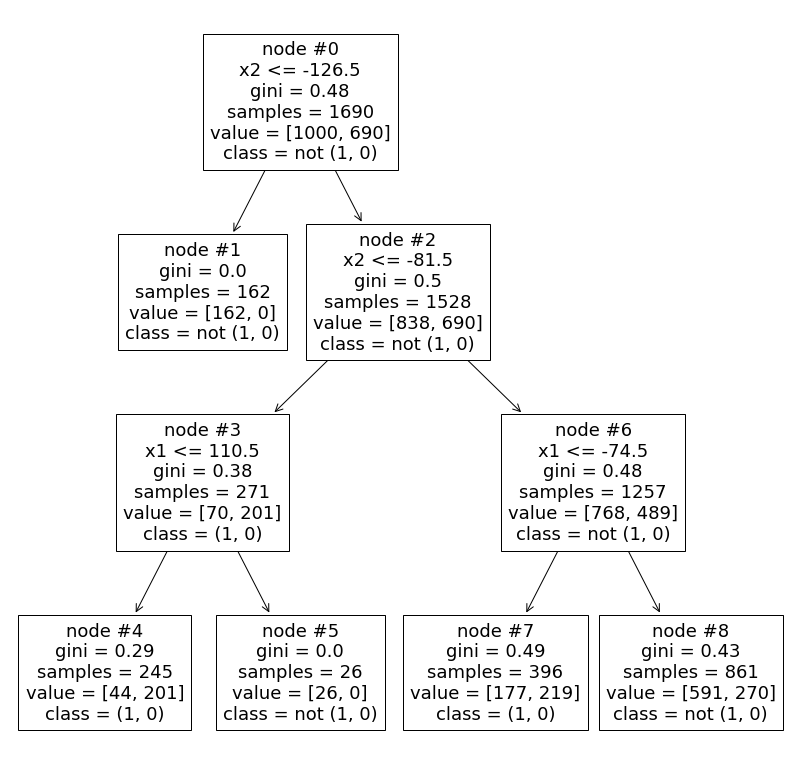

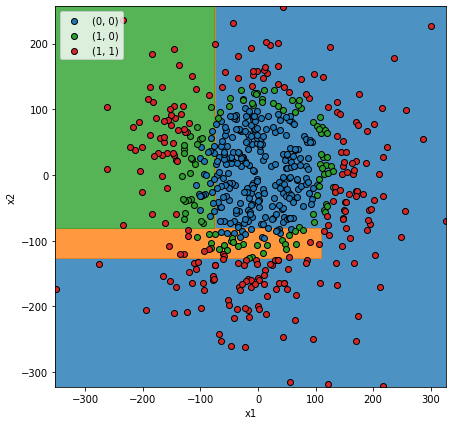

In [9]:
explain(max_depth=3)

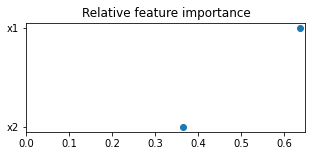

node #11: if (x1 > -142.0) and (x1 <= -74.5) and (x2 > -81.5) then class (1, 0) (covers 0.678 of 323 instances)
node #14: if (x1 > 84.5) and (x2 > -81.5) then class (1, 0) (covers 0.605 of 243 instances)
node #6: if (x1 > -108.5) and (x1 <= 110.5) and (x2 > -126.5) and (x2 <= -81.5) then class (1, 0) (covers 0.885 of 227 instances)

generated data evaluation:
              precision    recall  f1-score   support

  not (1, 0)       0.86      0.77      0.82      1000
      (1, 0)       0.72      0.82      0.76       690

    accuracy                           0.79      1690
   macro avg       0.79      0.80      0.79      1690
weighted avg       0.80      0.79      0.80      1690


original data evaluation:
              precision    recall  f1-score   support

  not (1, 0)       0.94      0.74      0.83       499
      (1, 0)       0.37      0.75      0.50       101

    accuracy                           0.74       600
   macro avg       0.65      0.75      0.66       600
weighted avg

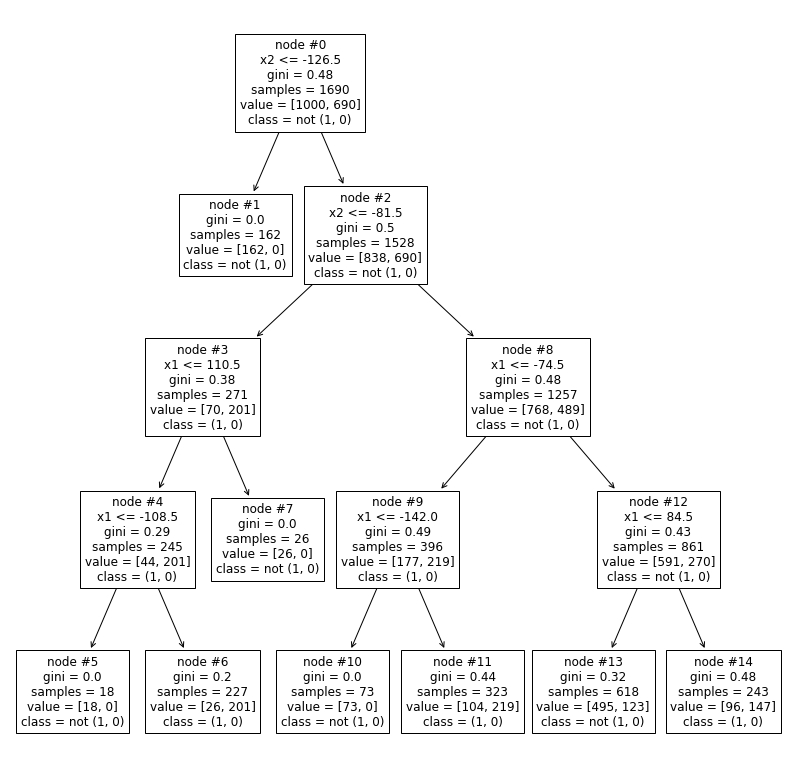

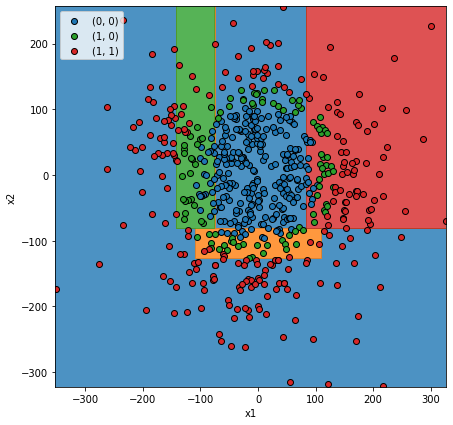

In [10]:
explain(max_depth=4)

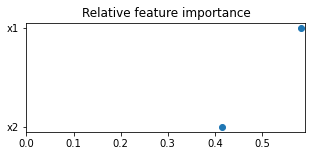

node #8: if (x1 > -108.5) and (x1 <= 110.5) and (x2 > -124.5) and (x2 <= -81.5) then class (1, 0) (covers 0.904 of 219 instances)
node #14: if (x1 > -142.0) and (x1 <= -103.5) and (x2 > -81.5) then class (1, 0) (covers 0.816 of 190 instances)
node #19: if (x1 > -74.5) and (x1 <= 84.5) and (x2 > 85.5) then class (1, 0) (covers 0.578 of 185 instances)
node #21: if (x1 > 84.5) and (x1 <= 127.5) and (x2 > -81.5) then class (1, 0) (covers 0.806 of 180 instances)

generated data evaluation:
              precision    recall  f1-score   support

  not (1, 0)       0.91      0.83      0.87      1000
      (1, 0)       0.78      0.88      0.83       690

    accuracy                           0.85      1690
   macro avg       0.84      0.85      0.85      1690
weighted avg       0.86      0.85      0.85      1690


original data evaluation:
              precision    recall  f1-score   support

  not (1, 0)       0.97      0.82      0.89       499
      (1, 0)       0.49      0.89      0.64    

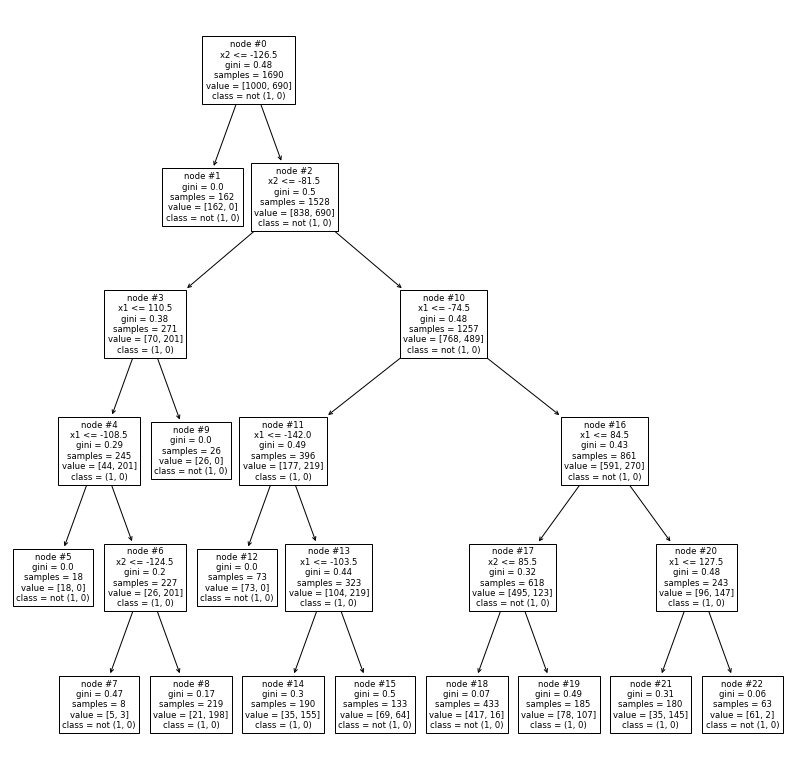

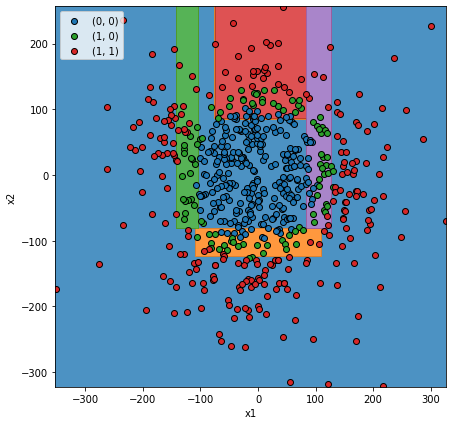

In [11]:
explain(max_depth=5)

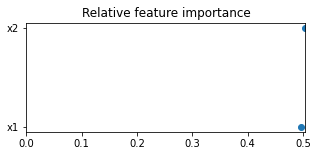

node #19: if (x1 > -142.0) and (x1 <= -103.5) and (x2 > -81.5) and (x2 <= 72.0) then class (1, 0) (covers 0.889 of 171 instances)
node #11: if (x1 > -108.5) and (x1 <= 110.5) and (x2 > -124.5) and (x2 <= -92.5) then class (1, 0) (covers 0.957 of 162 instances)
node #35: if (x1 > 95.5) and (x1 <= 127.5) and (x2 > -81.5) then class (1, 0) (covers 0.906 of 128 instances)
node #30: if (x1 > -74.5) and (x1 <= 84.5) and (x2 > 85.5) and (x2 <= 129.5) then class (1, 0) (covers 0.857 of 119 instances)
node #23: if (x1 > -103.5) and (x1 <= -74.5) and (x2 > 47.5) then class (1, 0) (covers 0.767 of 73 instances)
node #12: if (x1 > -108.5) and (x1 <= 110.5) and (x2 > -92.5) and (x2 <= -81.5) then class (1, 0) (covers 0.754 of 57 instances)
node #34: if (x1 > 84.5) and (x1 <= 95.5) and (x2 > -81.5) then class (1, 0) (covers 0.558 of 52 instances)
node #9: if (x1 > -43.0) and (x1 <= 110.5) and (x2 > -126.5) and (x2 <= -124.5) then class (1, 0) (covers 0.75 of 4 instances)

generated data evaluation:


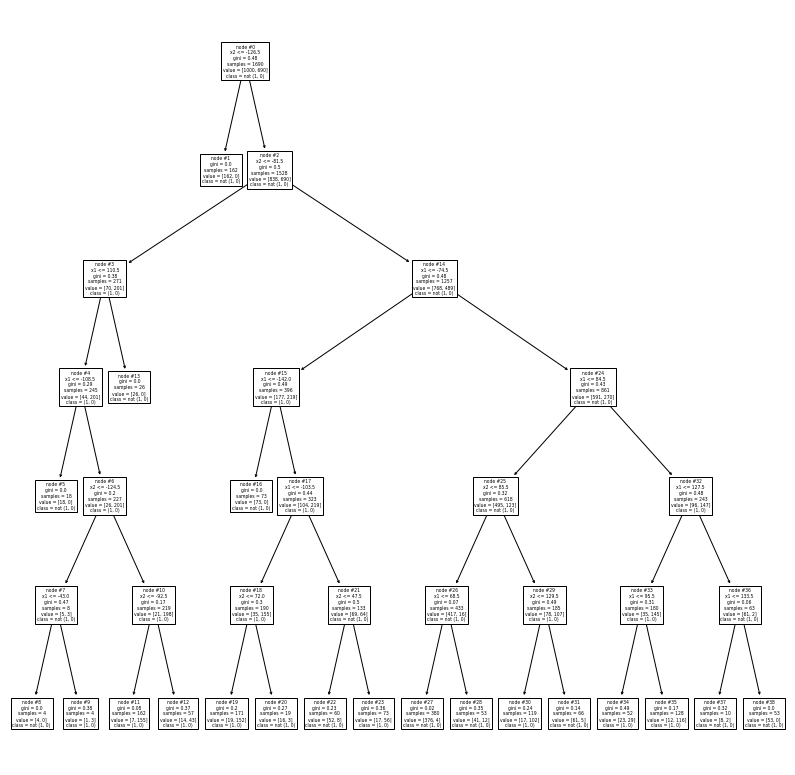

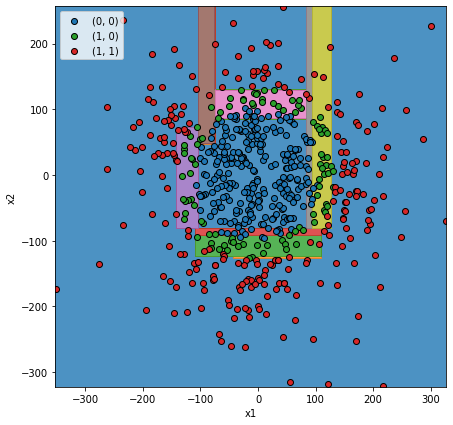

In [12]:
explain(max_depth=6)

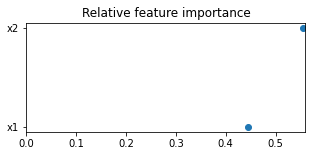

node #27: if (x1 > -142.0) and (x1 <= -103.5) and (x2 > -65.5) and (x2 <= 72.0) then class (1, 0) (covers 0.914 of 162 instances)
node #14: if (x1 > -108.5) and (x1 <= 69.5) and (x2 > -124.5) and (x2 <= -92.5) then class (1, 0) (covers 0.98 of 153 instances)
node #60: if (x1 > 95.5) and (x1 <= 127.5) and (x2 > -81.5) and (x2 <= 111.0) then class (1, 0) (covers 0.928 of 125 instances)
node #50: if (x1 > -74.5) and (x1 <= 84.5) and (x2 > 97.5) and (x2 <= 129.5) then class (1, 0) (covers 0.978 of 92 instances)
node #36: if (x1 > -103.5) and (x1 <= -74.5) and (x2 > 47.5) and (x2 <= 113.5) then class (1, 0) (covers 0.875 of 64 instances)
node #18: if (x1 > -108.5) and (x1 <= 110.5) and (x2 > -89.5) and (x2 <= -81.5) then class (1, 0) (covers 0.872 of 47 instances)
node #57: if (x1 > 84.5) and (x1 <= 95.5) and (x2 > -81.5) and (x2 <= -47.5) then class (1, 0) (covers 0.955 of 22 instances)
node #15: if (x1 > 69.5) and (x1 <= 110.5) and (x2 > -124.5) and (x2 <= -92.5) then class (1, 0) (covers

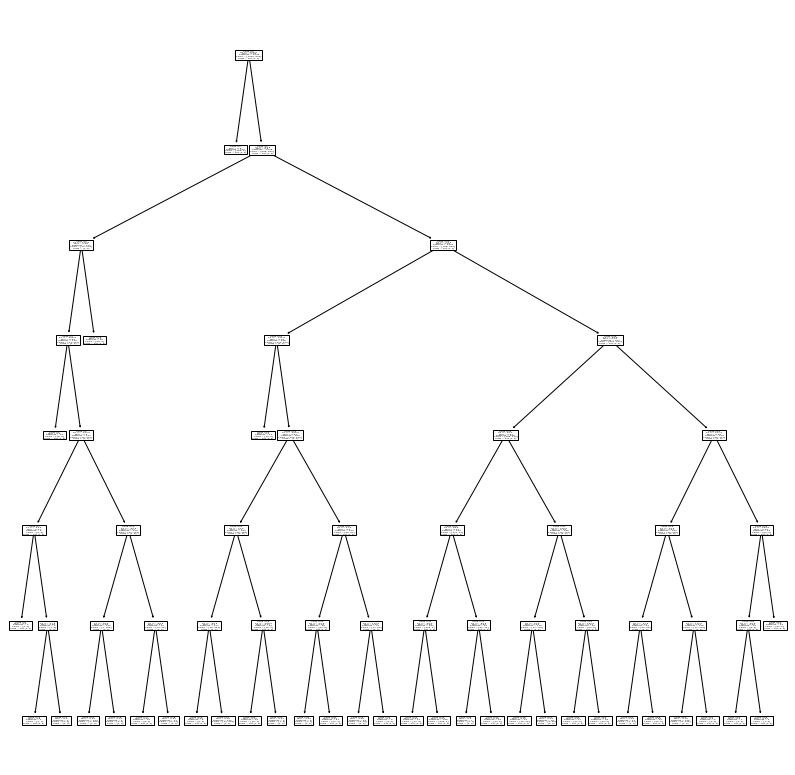

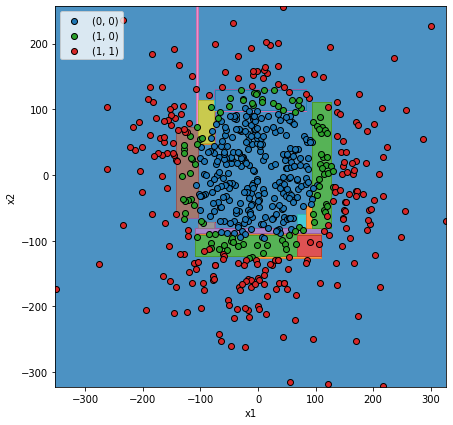

In [13]:
explain(max_depth=7)

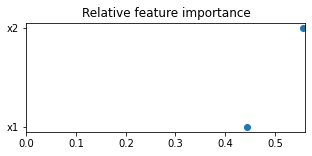

node #18: if (x1 > -86.5) and (x1 <= 69.5) and (x2 > -124.5) and (x2 <= -92.5) then class (1, 0) (covers 0.986 of 147 instances)
node #40: if (x1 > -142.0) and (x1 <= -110.0) and (x2 > -65.5) and (x2 <= 72.0) then class (1, 0) (covers 0.945 of 127 instances)
node #101: if (x1 > 95.5) and (x1 <= 126.5) and (x2 > -81.5) and (x2 <= 111.0) then class (1, 0) (covers 0.957 of 117 instances)
node #84: if (x1 > -74.5) and (x1 <= 84.5) and (x2 > 102.5) and (x2 <= 129.5) then class (1, 0) (covers 1.0 of 83 instances)
node #60: if (x1 > -103.5) and (x1 <= -74.5) and (x2 > 62.0) and (x2 <= 113.5) then class (1, 0) (covers 0.961 of 51 instances)
node #41: if (x1 > -110.0) and (x1 <= -103.5) and (x2 > -65.5) and (x2 <= 72.0) then class (1, 0) (covers 0.8 of 35 instances)
node #28: if (x1 > 43.0) and (x1 <= 110.5) and (x2 > -89.5) and (x2 <= -81.5) then class (1, 0) (covers 1.0 of 29 instances)
node #94: if (x1 > 84.5) and (x1 <= 95.5) and (x2 > -81.5) and (x2 <= -51.5) then class (1, 0) (covers 1.0 

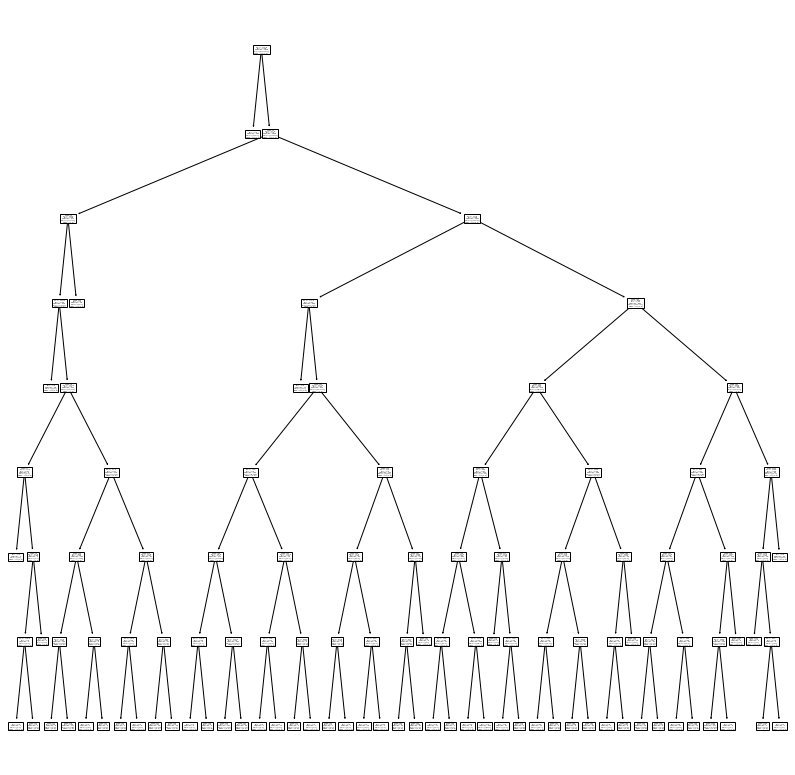

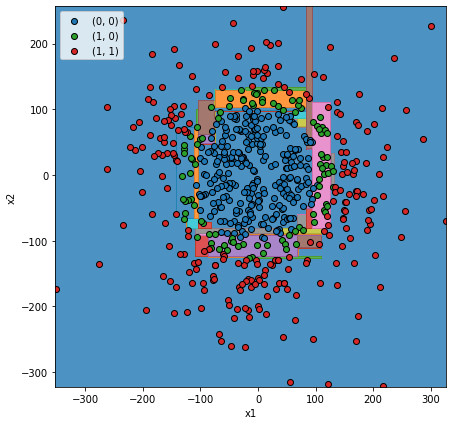

In [14]:
explain(max_depth=8)

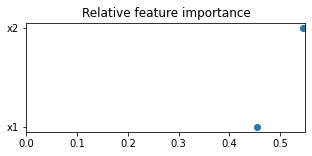

node #21: if (x1 > -86.5) and (x1 <= 62.0) and (x2 > -124.5) and (x2 <= -92.5) then class (1, 0) (covers 0.993 of 141 instances)
node #47: if (x1 > -142.0) and (x1 <= -110.0) and (x2 > -65.5) and (x2 <= 37.5) then class (1, 0) (covers 1.0 of 104 instances)
node #135: if (x1 > 95.5) and (x1 <= 126.5) and (x2 > -25.0) and (x2 <= 111.0) then class (1, 0) (covers 0.988 of 83 instances)
node #108: if (x1 > -74.5) and (x1 <= 84.5) and (x2 > 102.5) and (x2 <= 129.5) then class (1, 0) (covers 1.0 of 83 instances)
node #78: if (x1 > -102.0) and (x1 <= -74.5) and (x2 > 62.0) and (x2 <= 113.5) then class (1, 0) (covers 0.98 of 50 instances)
node #134: if (x1 > 95.5) and (x1 <= 126.5) and (x2 > -81.5) and (x2 <= -25.0) then class (1, 0) (covers 0.882 of 34 instances)
node #34: if (x1 > 43.0) and (x1 <= 110.5) and (x2 > -89.5) and (x2 <= -81.5) then class (1, 0) (covers 1.0 of 29 instances)
node #48: if (x1 > -142.0) and (x1 <= -110.0) and (x2 > 37.5) and (x2 <= 72.0) then class (1, 0) (covers 0.69

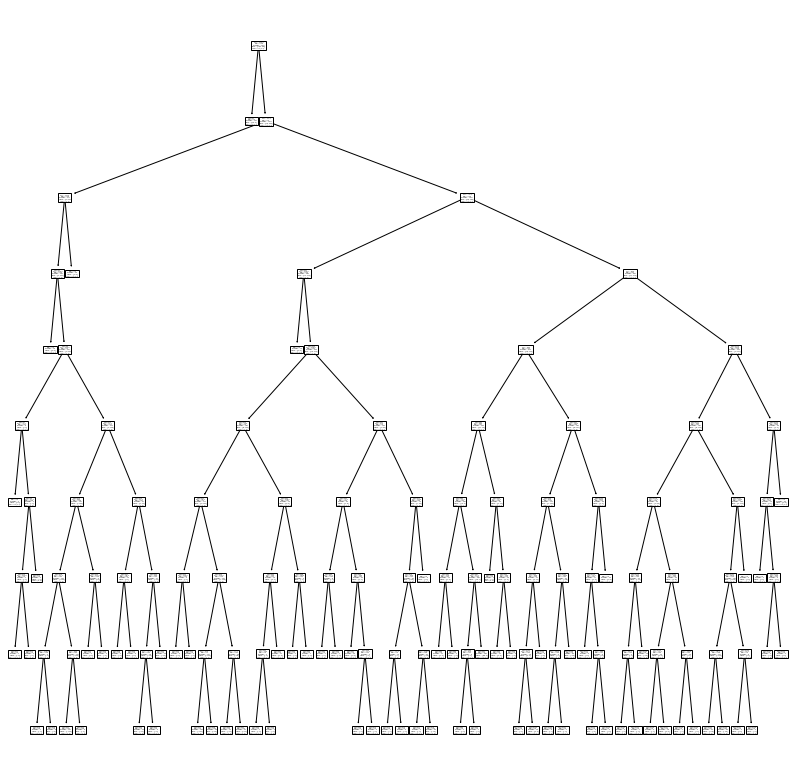

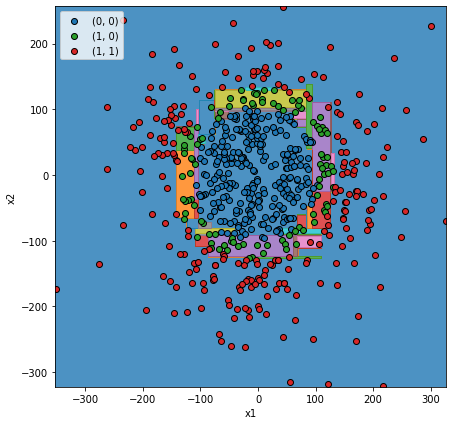

In [15]:
explain(max_depth=9)